In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Ảnh âm bản

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


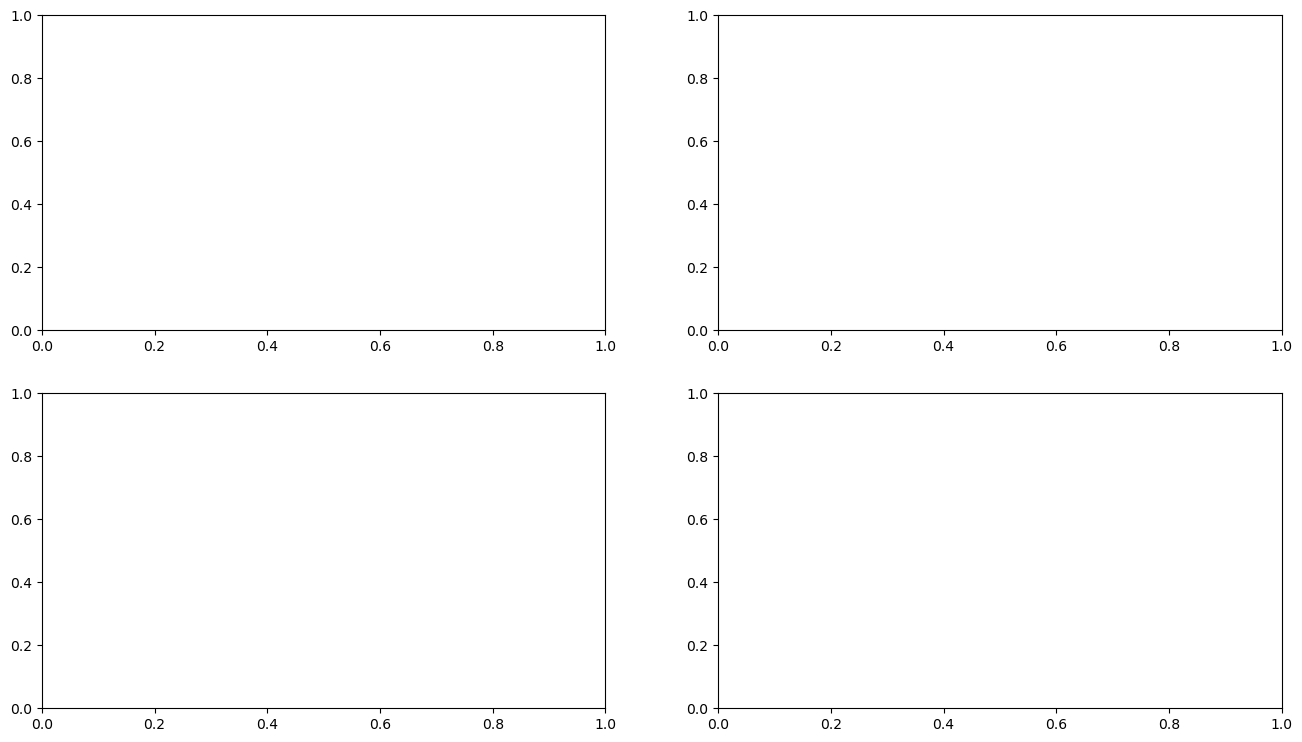

In [8]:
img = cv2.imread('avatar.jpg')
am_ban=255-img
fig = plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)=fig.subplots(2,2)
anh1=cv2.imshow(img,cmap='gray')
anh2=cv2.imshow(am_ban,cmap='gray')
hist1=cv2.hist(img)
hist2=cv2.hist(am_ban)
